In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_name = "rasFile.ras"

In [2]:
# Open file and read into a list
file_object = open(file_name)
file_object

<_io.TextIOWrapper name='rasFile.ras' mode='r' encoding='cp1252'>

In [3]:
lines = file_object.readlines()
lines [:10]

['*RAS_DATA_START\n',
 '*RAS_HEADER_START\n',
 '*CORR_POS_DB_NAME "SRM640f/Cu/Soller_slit_5.0deg/Soller_slit_5.0deg/0.625deg/DteX100"\n',
 '*CORR_POS_GONIO_RADIUS "0"\n',
 '*CORR_POS_NODE_INDEX02 "2"\n',
 '*CORR_POS_NODE_INDEX03 "3"\n',
 '*CORR_POS_NODE_INDEX04 "4"\n',
 '*CORR_POS_NODE_INDEX05 "5"\n',
 '*CORR_POS_NODE_INDEX06 "6"\n',
 '*CORR_POS_NODE_INDEX07 "7"\n']

In [4]:
lines_array = np.array(lines)
lines_array

array(['*RAS_DATA_START\n', '*RAS_HEADER_START\n',
       '*CORR_POS_DB_NAME "SRM640f/Cu/Soller_slit_5.0deg/Soller_slit_5.0deg/0.625deg/DteX100"\n',
       ..., '*RAS_INT_END\n', '*RAS_DATA_END\n', '*DSC_DATA_END\n'],
      shape=(18301,), dtype='<U86')

In [5]:
# Filter out non-numerical data 
mask = np.char.find(lines, '*') == -1
start_index = np.argmax(mask) if np.any(mask) else None
mask = mask[start_index:]
lines = lines[start_index:]
end_index = np.argmax(~mask) if np.any(~mask) else None
if end_index:
    lines = lines[:end_index]
lines[-1]

'90.0000 319.7711 1.0000\n'

In [6]:
# Separate each row and datapoint
data_rows = [line.strip().split() for line in lines]
data_rows[:5]

[['2.0000', '4387.0000', '1.0000'],
 ['2.0050', '4387.0000', '1.0000'],
 ['2.0100', '4387.0000', '1.0000'],
 ['2.0150', '4387.1786', '1.0000'],
 ['2.0200', '4389.8307', '1.0000']]

In [7]:
# Insert data into a dataframe, format and save 
raw_dataframe = pd.DataFrame(data_rows, columns = ["2_theta", "intensity", "unk"])
raw_dataframe = raw_dataframe.astype({'2_theta': 'float64', 'intensity': 'float64', 'unk': 'float64'})
raw_dataframe.to_csv('raw_output.csv', index=False)
raw_dataframe.head()

,2_theta,intensity,unk
0,2.000,4387.0000,1.0
1,2.005,4387.0000,1.0
2,2.010,4387.0000,1.0
3,2.015,4387.1786,1.0
4,2.020,4389.8307,1.0


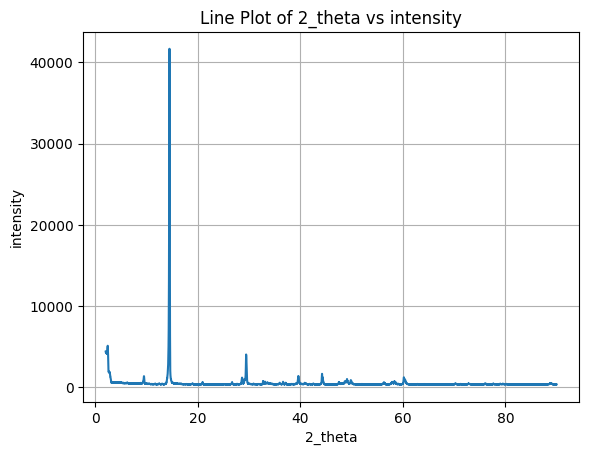

In [8]:
# Create visualization plot for raw data
plt.plot(raw_dataframe['2_theta'], raw_dataframe['intensity'])
plt.xlabel('2_theta')
plt.ylabel('intensity')
plt.title('Line Plot of 2_theta vs intensity')
plt.grid(True)
plt.savefig("raw_plot.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [9]:
# Create a copy of original dataframe
processed_dataframe = raw_dataframe.copy()

# Change x-axis to start at 0
processed_dataframe["2_theta"] = processed_dataframe["2_theta"] - np.min(processed_dataframe["2_theta"])
processed_dataframe.to_csv('processed_output.csv', index=False)
processed_dataframe.head()

,2_theta,intensity,unk
0,0.000,4387.0000,1.0
1,0.005,4387.0000,1.0
2,0.010,4387.0000,1.0
3,0.015,4387.1786,1.0
4,0.020,4389.8307,1.0


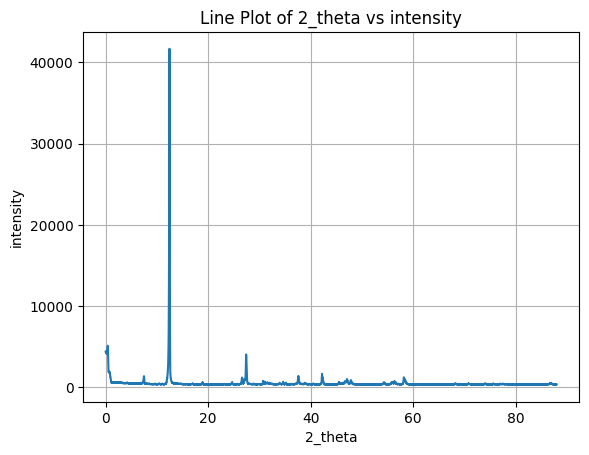

In [10]:
# Create visualization plot for processed data
plt.plot(processed_dataframe['2_theta'], processed_dataframe['intensity'])
plt.xlabel('2_theta')
plt.ylabel('intensity')
plt.title('Line Plot of 2_theta vs intensity')
plt.grid(True)
plt.savefig("processed_plot.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()